In [1]:
# 1. Visualizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploracion

In [2]:
bank_info = pd.read_csv('./bank-additional-full.csv', delimiter=';')

print(f"Cantidad de registros totales: {len(bank_info)}")
print(f"Cantidad de atributos del dataset: {len(bank_info.columns)}")
print(f"Atributos: {list(bank_info.columns)}")

Cantidad de registros totales: 41188
Cantidad de atributos del dataset: 21
Atributos: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [3]:
bank_info['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Con el snippet de arriba podemos ver que contamos con 36k de muestras de usuarios que no se suscribieron y tan solo 4.6k de usuarios que si lo hicieron.
Esto nos delata un desbalanceo de clase bastante importante, 12% del dataset corresponde a los que se suscribieron.

In [4]:
bank_info.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# vemos que habian un par de registros duplicados
bank_info.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
bank_info['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
# vamos a guardar una lista de atributos que presumimos que no nos aportarán grandes cantidades de inforamcion
# esto con el objetivo de reducir la cantidad de features que nuestro modelos tendrá que aprender a generalizar.

features_to_drop = []

# Visualization

### Grafiquemos algunas variables para intentar descartar o interpretar mejor la informacion

In [84]:
subscribed_users = bank_info[bank_info['y'] == 'yes']
not_subscribed_users = bank_info[bank_info['y'] == 'no']

<AxesSubplot: xlabel='age', ylabel='Density'>

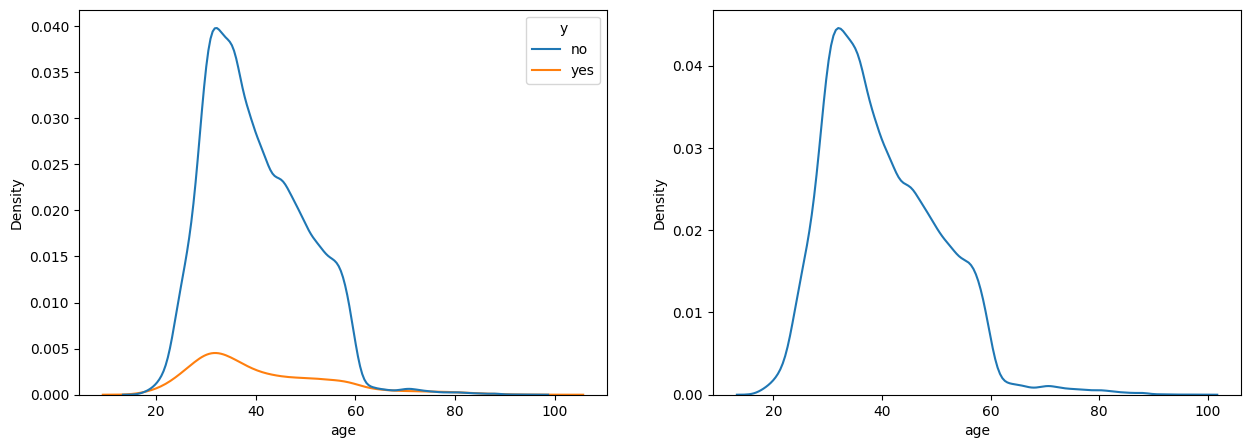

In [12]:
# grafico de densidad de Edad
fig, axes = plt.subplots(1, 2 ,figsize=(15, 5))
sns.kdeplot(ax=axes[0], data = bank_info, x='age', hue='y')
sns.kdeplot(ax=axes[1], data = bank_info, x='age')
# al hacer el hue por resultado obtenemos gran diferencia producto del desbalanceo de clases

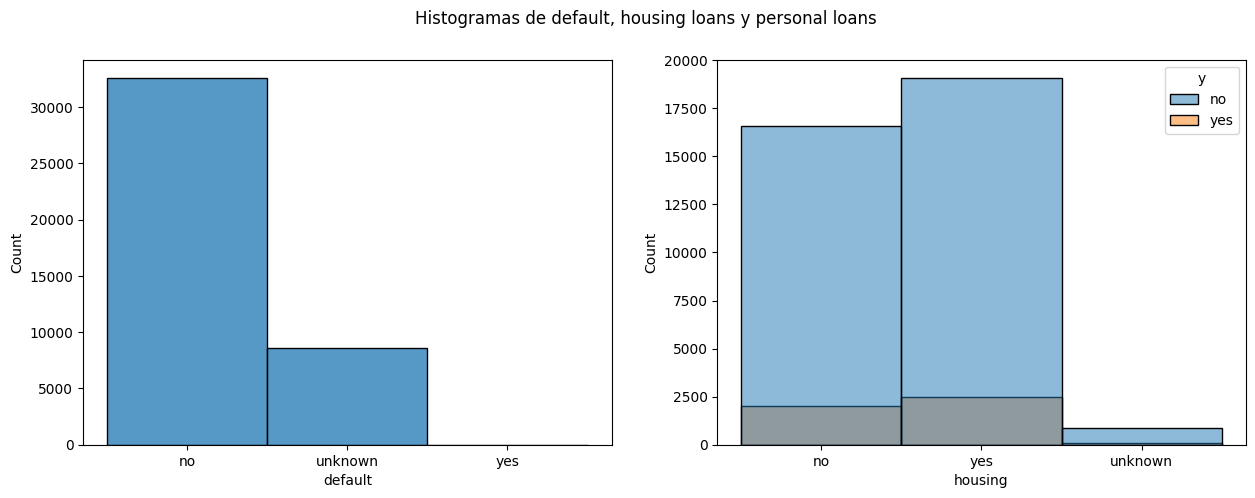

In [100]:
fig, axes = plt.subplots(1, 2 ,figsize=(15, 5))
fig.suptitle('Histogramas de default, housing loans y personal loans')

# En el grafico de la izquierda vemos que los valores de default son o No o No se sabe, por lo que el modelo
# no podrá generalizar a casos en los que si hay default.
sns.histplot(ax=axes[0] ,data = bank_info, x = 'default')

# En el grafico de la derecha vemos que la distribucion de no/yes para housing loans son bastante similares tanto para
# los users que tomaron el credito como para los que no, por lo que podemos inductivamente asumir que no afecta al resultado
sns.histplot(ax=axes[1] ,data = bank_info, x = 'housing', hue='y')

features_to_drop.append('default')
features_to_drop.append('housing')

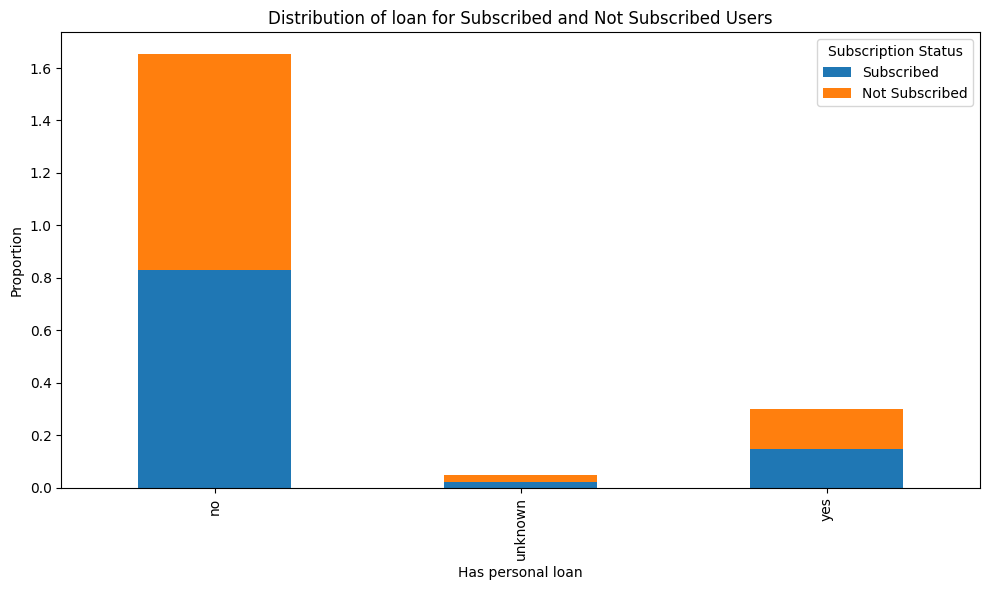

In [104]:
subscribed_loan_counts = subscribed_users['loan'].value_counts(normalize=True).sort_index()
not_subscribed_loan_counts = not_subscribed_users['loan'].value_counts(normalize=True).sort_index()

loan_comparison = pd.DataFrame({
    'Subscribed': subscribed_loan_counts,
    'Not Subscribed': not_subscribed_loan_counts
})

loan_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of loan for Subscribed and Not Subscribed Users')
plt.xlabel('Has personal loan')
plt.ylabel('Proportion')
plt.legend(title='Subscription Status')

plt.tight_layout()
plt.show()

# distribuciones identicas, elegimos no basarnos en esto

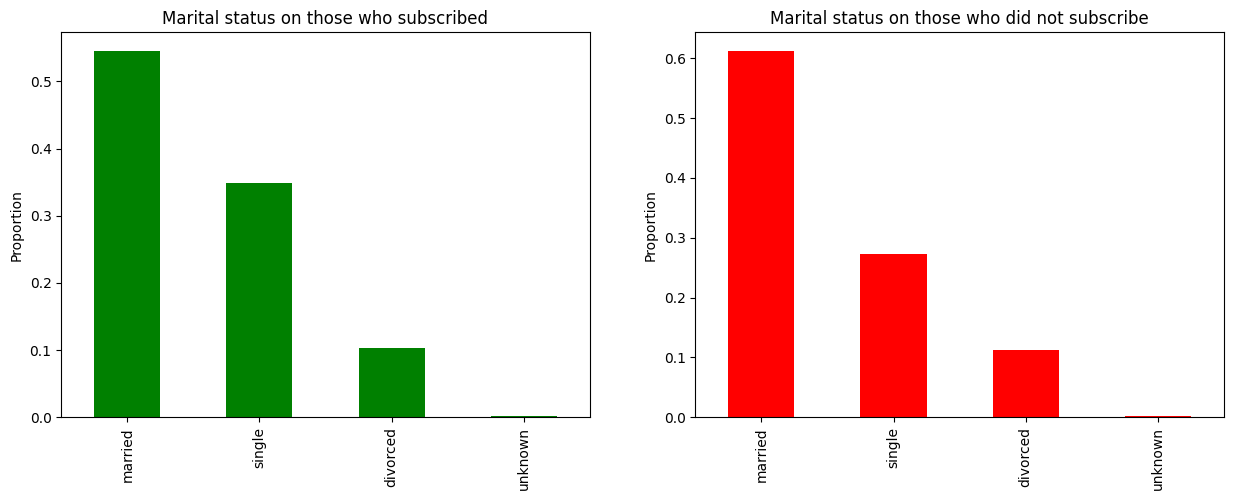

In [85]:
positive_counts = subscribed_users['marital'].value_counts(normalize=True).sort_index()
negative_counts = not_subscribed_users['marital'].value_counts(normalize=True).sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

positive_counts.plot(kind='bar', color='green', ax=axes[0])
axes[0].set_title('Marital status on those who subscribed')
axes[0].set_ylabel('Proportion')

negative_counts.plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title('Marital status on those who did not subscribe')
axes[1].set_ylabel('Proportion')

plt.show()

# proporcionalmente son lo mismo! luego podemos descartar la feature
features_to_drop.append('marital')


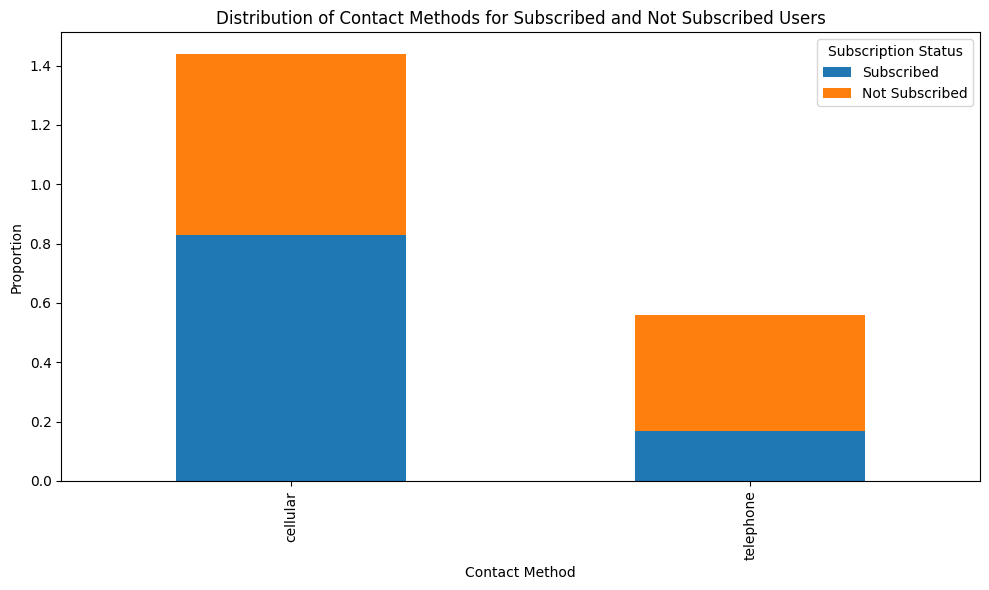

In [79]:
subscribed_contact_counts = subscribed_users['contact'].value_counts(normalize=True).sort_index()
not_subscribed_contact_counts = not_subscribed_users['contact'].value_counts(normalize=True).sort_index()

contact_comparison = pd.DataFrame({
    'Subscribed': subscribed_contact_counts,
    'Not Subscribed': not_subscribed_contact_counts
})

contact_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Contact Methods for Subscribed and Not Subscribed Users')
plt.xlabel('Contact Method')
plt.ylabel('Proportion')
plt.legend(title='Subscription Status')

plt.tight_layout()
plt.show()

# esto podria decir que dentro de los usuarios a los que se contactó por celular, mas gente se suscribió
# mientras que de los que llamaron por telefono fijo mas gente no se suscribió


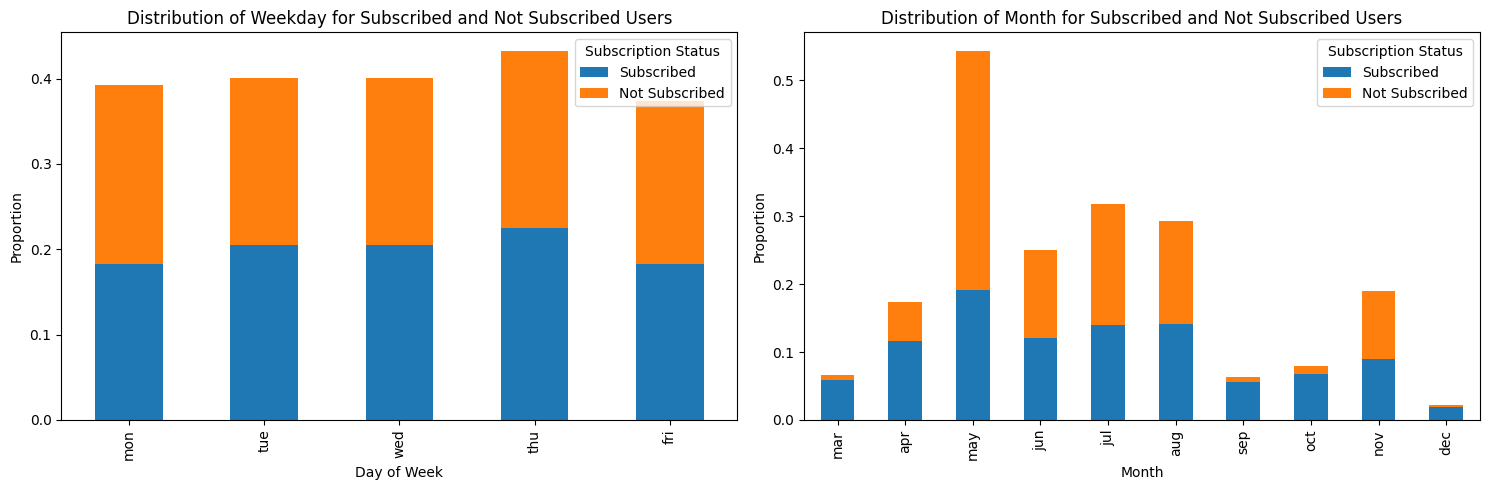

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ordenar por día de la semana
subscribed_weekday_counts = subscribed_users['day_of_week'].value_counts(normalize=True).sort_index()
not_subscribed_weekday_counts = not_subscribed_users['day_of_week'].value_counts(normalize=True).sort_index()

weekday_order = ['mon', 'tue', 'wed', 'thu', 'fri']  # Definir el orden deseado
subscribed_weekday_counts = subscribed_weekday_counts.reindex(weekday_order)
not_subscribed_weekday_counts = not_subscribed_weekday_counts.reindex(weekday_order)

contact_comparison = pd.DataFrame({
    'Subscribed': subscribed_weekday_counts,
    'Not Subscribed': not_subscribed_weekday_counts
})

contact_comparison.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of Weekday for Subscribed and Not Subscribed Users')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Subscription Status')

# Ordenar por mes
subscribed_month_counts = subscribed_users['month'].value_counts(normalize=True).sort_index()
not_subscribed_month_counts = not_subscribed_users['month'].value_counts(normalize=True).sort_index()

month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']  # Definir el orden deseado
subscribed_month_counts = subscribed_month_counts.reindex(month_order)
not_subscribed_month_counts = not_subscribed_month_counts.reindex(month_order)

contact_comparison = pd.DataFrame({
    'Subscribed': subscribed_month_counts,
    'Not Subscribed': not_subscribed_month_counts
})

contact_comparison.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribution of Month for Subscribed and Not Subscribed Users')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Subscription Status')

plt.tight_layout()
plt.show()

# en cuanto a dias de semana vemos que hay distribuciones identicas
# en cuanto a meses vemos que hay meses en los que hay mas suscritos que no como diciembre, marzo y otros en los que menos gente se suscribe como mayo/julio


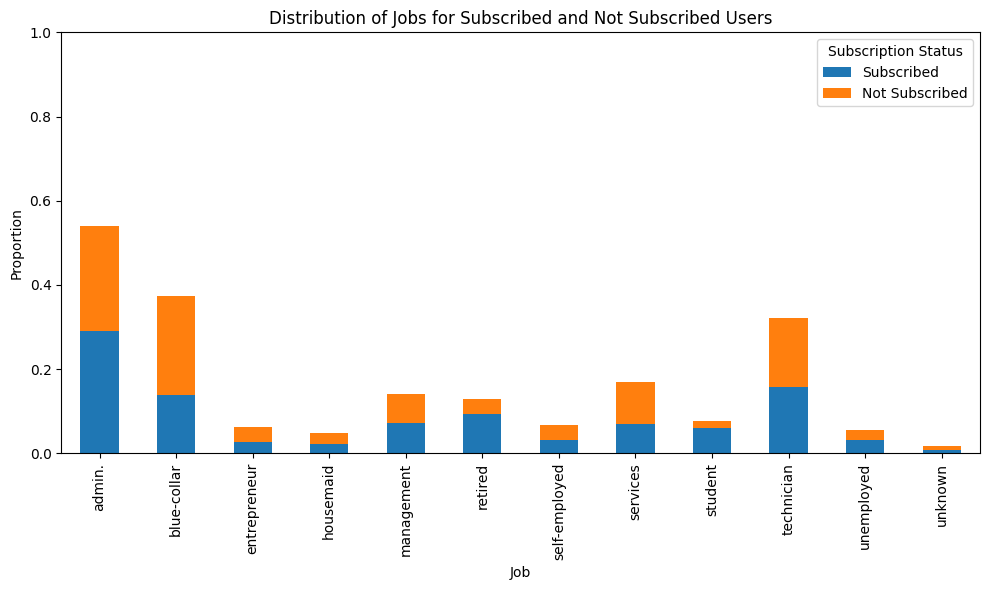

In [87]:
subscribed_contact_counts = subscribed_users['job'].value_counts(normalize=True).sort_index()
not_subscribed_contact_counts = not_subscribed_users['job'].value_counts(normalize=True).sort_index()

contact_comparison = pd.DataFrame({
    'Subscribed': subscribed_contact_counts,
    'Not Subscribed': not_subscribed_contact_counts
})

ax = contact_comparison.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Jobs for Subscribed and Not Subscribed Users')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.legend(title='Subscription Status')

plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# es una variable categorica muy pesada
# en casos como estudiantes, jubilados, y blue-collar parece como que hay mas probabilidad de una clase que de otra
# pero en muchas otras clases no hay mucho peso.
# si no obtenemos buenos resultados en clasificacion volvemos a este paso

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911
std        1.570960        0.578840       4.628198      1.734447     72.251528
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000
max        1.400000       94.767000     -26.900000      5.045000   5228.100000


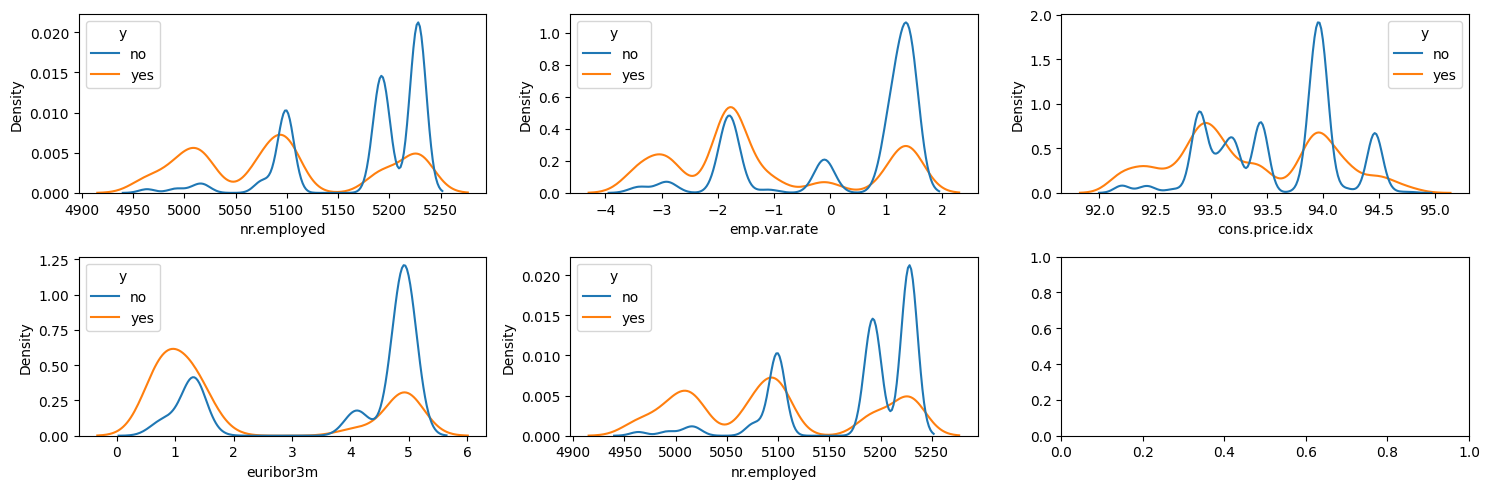

In [94]:
# social and economic context attributes
social_and_economic = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
print(bank_info[social_and_economic].describe())

fig, axes = plt.subplots(2, 3 ,figsize=(15, 5))

sns.kdeplot(ax=axes[0,0], data = bank_info, x='nr.employed', hue= 'y', common_norm=False)
# nr.employed -> parece que las que tienen < 5000 tienden al sí mientras que tienen > 5000 gana el no

sns.kdeplot(ax=axes[0,1], data = bank_info, x='emp.var.rate', hue= 'y', common_norm=False)
# nr.employed -> parece que las que tienen < 5000 tienden al sí mientras que tienen > 5000 gana el no

sns.kdeplot(ax=axes[0,2], data = bank_info, x='cons.price.idx', hue= 'y', common_norm=False)

sns.kdeplot(ax=axes[1,0], data = bank_info, x='euribor3m', hue= 'y', common_norm=False)

sns.kdeplot(ax=axes[1,1], data = bank_info, x='nr.employed', hue= 'y', common_norm=False)
# cons.price.idx muy bajo desvio estandar -> poca dispersion. asumimos que no aporta informacion a lo que va del caso

plt.tight_layout()
features_to_drop.append('cons.price.idx')
features_to_drop.append('emp.var.rate')

# Classification

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [105]:
# finalmente las features que dropearemos serán
features_to_drop =  ['job', 'marital', 'default', 'housing', 'loan', 'day_of_week', 'campaign', 'emp.var.rate', 'cons.conf.idx', 'nr.employed']

In [204]:
bank_info_useful = bank_info.drop(columns=features_to_drop)
bank_info_useful.head(5)

,age,education,contact,month,duration,pdays,previous,poutcome,cons.price.idx,euribor3m,y
0,56,basic.4y,telephone,may,261,999,0,nonexistent,93.994,4.857,no
1,57,high.school,telephone,may,149,999,0,nonexistent,93.994,4.857,no
2,37,high.school,telephone,may,226,999,0,nonexistent,93.994,4.857,no
3,40,basic.6y,telephone,may,151,999,0,nonexistent,93.994,4.857,no
4,56,high.school,telephone,may,307,999,0,nonexistent,93.994,4.857,no


In [205]:

transformer = make_column_transformer((OneHotEncoder(), ['education', 'contact', 'month', 'poutcome']), remainder='passthrough')
transformed = transformer.fit_transform(bank_info_useful)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.head(5)


,onehotencoder__education_basic.4y,onehotencoder__education_basic.6y,onehotencoder__education_basic.9y,onehotencoder__education_high.school,onehotencoder__education_illiterate,onehotencoder__education_professional.course,onehotencoder__education_university.degree,onehotencoder__education_unknown,onehotencoder__contact_cellular,onehotencoder__contact_telephone,...,onehotencoder__poutcome_failure,onehotencoder__poutcome_nonexistent,onehotencoder__poutcome_success,remainder__age,remainder__duration,remainder__pdays,remainder__previous,remainder__cons.price.idx,remainder__euribor3m,remainder__y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,56,261,999,0,93.994,4.857,no
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,57,149,999,0,93.994,4.857,no
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,37,226,999,0,93.994,4.857,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,40,151,999,0,93.994,4.857,no
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,56,307,999,0,93.994,4.857,no


In [206]:
# decido downsamplear los casos negativos para tratar de lidiar con el desbalance de las clases

positive_result = transformed_df[transformed_df['remainder__y'] == 'yes']
negative_result = transformed_df[transformed_df['remainder__y'] == 'no']

negative_downsampled = resample(negative_result, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(positive_result),     # to match minority class
                                 random_state=123) # reproducible results
transformed_df = pd.concat([positive_result, negative_downsampled])

In [207]:
# armo el vector de features y labels

y = transformed_df['remainder__y']
X = transformed_df.drop(columns='remainder__y')

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

In [277]:
# balanced dataset
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

yes    0.5
no     0.5
Name: remainder__y, dtype: float64
no     0.501206
yes    0.498794
Name: remainder__y, dtype: float64


In [278]:
# Primero modelo: Arbol de clasificacion, altura infinita (potencial overfitting)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [279]:
# ni tan mal
print(f'score: {round(tree.score(X_test, y_test), 2) * 100}%')
print(f'params: {tree.get_params()}')
print(f'max_height: {tree.get_depth()}')

score: 82.0%
params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
max_height: 23


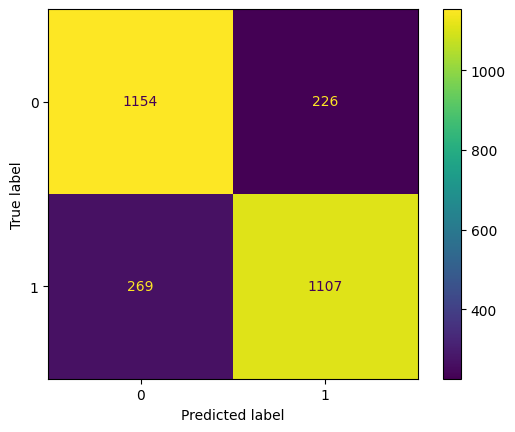

In [280]:
# en la matriz de confusion vemos que tenemos bastantes FP y FN
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [282]:
# Segundo modelo: probamos con KNN con gridsearch para ver algunas opciones
# variamos cantidad de vecinos y distancia utilizada
# GridSearch nos aportá tambien cross validation con K-fold

hyperparams_matrix = {
    'n_neighbors': [3, 5, 10, 20],
    'metric': ['minkowski', 'cityblock', 'l1', 'manhattan']
}

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=hyperparams_matrix, cv= 5)
knn.fit(X, y)

print(f'best params with KNN: {knn.best_params_}')
print(f'best score with KNN: {round(knn.best_score_ * 100, 2)}%')

best params with KNN: {'metric': 'cityblock', 'n_neighbors': 20}
best score with KNN: 80.7%


In [283]:
# Tercer modelo: gradient boosting trees
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1, random_state=0).fit(X_train, y_train)
gradient_boost.score(X_test, y_test)

0.8733671988388969

In [288]:
# cuarto modelo: random forest
hyperparam_matrix = {
    'n_estimators': [100],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=hyperparam_matrix, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best score: {round(best_score * 100, 2)}%')

rf = grid_search.best_estimator_
test_accuracy = rf.score(X_test, y_test)
print(f'Accuracy on test set: {round(test_accuracy * 100, 2)}%')


Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 88.0%
Accuracy on test set: 87.77%


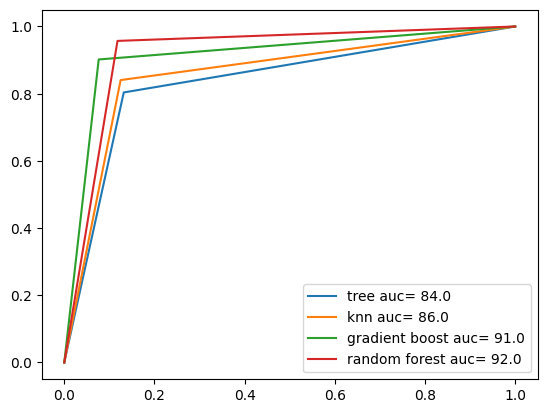

In [321]:
# ROC & AUC curves
models = {'tree': tree, 'knn': knn, 'gradient boost': gradient_boost, 'random forest': rf}
for k, m in models.items():
    y_pred = m.predict(X_val)
    y_pred_transformed = [0 if i == 'no' else 1 for i in y_pred]
    y_val_transformed = [0 if i == 'no' else 1 for i in y_val]
    roc_curve(y_val_transformed, y_pred_transformed)
    fpr, tpr, thresh = roc_curve(y_val_transformed, y_pred_transformed)
    auc = roc_auc_score(y_val_transformed, y_pred_transformed)
    plt.plot(fpr,tpr,label=f"{k} auc= {str(round(auc, 2) * 100)}")
plt.legend(loc=0)


# Conclusion

Hay varios puntos que pudieron haber afectado la capacidad de clasificación del modelo debido a algunas decisiones tomadas. Estas son:
- Pérdida de información relevante en atributos descartados.
- Downsamplear los casos negativos pudo haber generado pérdida relevante, posibles soluciones hacer K folding entre el set de resultados negativos

### Modelos de Clasificacion:
1. Decision Tree
2. K-nearest neighbors (cross validation)
3. Gradient Boosting
4. Random Forest (cross validation, K-fold)